In [1]:
import string
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)
import numpy as np
from IPython.display import display

In [2]:
# taking csv prepared earlier to explore data 

filepath = "score.csv"
# Read the data into a pandas dataframe called emails

df = pd.read_csv(filepath)

headers = [header for header in df.columns]

print("Successfully loaded {} rows and {} columns!".format(df.shape[0], df.shape[1]))

Successfully loaded 312645 rows and 23 columns!


In [3]:
df.head(3)

,email-body,From,employee,Date,Subject,X-Folder,To,X-cc,X-Origin,year,...,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,topemotion
0,Here is our forecast,phillip.allen@enron.com,allen-p,2001-05-14 23:39:00+00:00,NaN,'sent mail,tim.belden@enron.com,NaN,Allen-P,2001,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,fear
1,Traveling to have a business meeting takes the fun out of the trip. Especially if you have to ...,phillip.allen@enron.com,allen-p,2001-05-04 20:51:00+00:00,Re:,'sent mail,john.lavorato@enron.com,NaN,Allen-P,2001,...,0.094070,0.096115,0.106339,0.089980,0.114519,0.104294,0.100204,0.096115,0.100204,positive
2,test successful. way to go!!!,phillip.allen@enron.com,allen-p,2000-10-18 10:00:00+00:00,Re: test,'sent mail,leah.arsdall@enron.com,NaN,Allen-P,2000,...,0.083333,0.111111,0.111111,0.083333,0.111111,0.111111,0.111111,0.083333,0.111111,anticip


#  NRCLex lib for emotion score

In [4]:
from nrclex import NRCLex
# https://pypi.org/project/NRCLex/
'''
NRCLex will measure emotional affect from a body of text. Affect dictionary contains approximately 27,000 words, 
and is based on the National Research Council Canada (NRC)affect lexicon (see link below) 
and the NLTK library's WordNet synonym sets.
'''

"\nNRCLex will measure emotional affect from a body of text. Affect dictionary contains approximately 27,000 words, \nand is based on the National Research Council Canada (NRC)affect lexicon (see link below) \nand the NLTK library's WordNet synonym sets.\n"

In [5]:
def emotion(x):
    text_object = NRCLex(x)
    fear = text_object.affect_frequencies['fear']
    anger = text_object.affect_frequencies['anger']
    anticip = text_object.affect_frequencies['anticip']
    trust = text_object.affect_frequencies['trust']
    surprise = text_object.affect_frequencies['surprise']
    positive = text_object.affect_frequencies['positive']
    negative = text_object.affect_frequencies['negative']
    sadness = text_object.affect_frequencies['sadness']
    disgust = text_object.affect_frequencies['disgust']
    joy = text_object.affect_frequencies['joy']
    topemotion = text_object.top_emotions[0][0]
    return pd.Series([fear, anger, anticip, trust, surprise, positive, negative, sadness, disgust, joy, topemotion], index=['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy', 'topemotion'])

In [6]:
# calling function to get emotion score

#df[['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy', 'topemotion']] = df['email-body'].swifter.apply(lambda x : emotion(x))

'''
already ran function to add score so no need to run again
'''

'\nalready ran in so no need to run again\n'

In [7]:
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
# Function to add time_hour of mail in features

def hr_func(ts):
    return ts.hour


# calling the function
df['time_hour'] = df['Date'].apply(hr_func)

In [22]:
### Function for creating class according to hour of a day
### for employee sending or receiving mails reflecting the stress level for work 

def label (row):
    if 9 <= row <= 17: # working hours of a normal office day-- stress level --- "Low"
        return 'Work'
    elif 17 < row <= 21: # working little late to complete work for the day --stress level--- "Medium"
        return 'Evening'
    elif (21 < row) & (row <= 24): # working really late or whole night --- stress level --- "High"
        return 'Night'
    return 'Night'


In [23]:
## adding the "working-hour" feature by calling the function

df['Work'] = df['time_hour'].apply (lambda row: label(row))


In [24]:
## having a look at new features

df[['topemotion', 'time_hour', 'Work']].head()

,topemotion,time_hour,Work
0,fear,23,Night
1,positive,20,Evening
2,anticip,10,Work
3,trust,13,Work
4,fear,12,Work


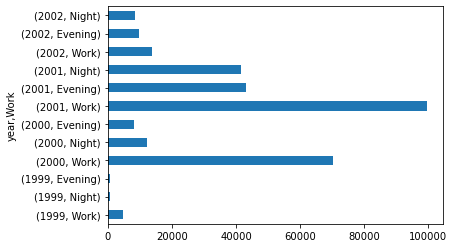

In [25]:
##  Ploting stress level over the years 

df.groupby("year")["Work"].value_counts().plot.barh()

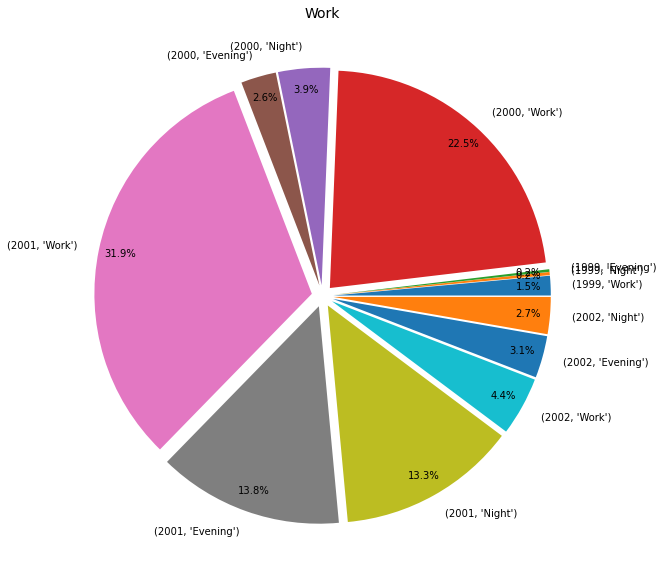

In [26]:
## Plotting the same in Pie chart

data = df.groupby("year")["Work"].value_counts()

pie, ax = plt.subplots(figsize=[16,10])

labels = data.keys()

plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*12, labels=labels, pctdistance=0.9)

plt.title("Work", fontsize=14);

In [17]:
### Function for plotting the wordcloud on the basis of sentiment analysis 

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
import wordcloud


def WC(Folder, stpwords = None):
    
    data = df.loc[df['X-Folder'] == Folder]
     
    
    stop_words = stopwords.words('english')
    
    list_stpwords = ['enron', 'com', 're', 'RECIPIENTS', 'CN', 'ENRON', 'OU', 'NA', 'Thank', 'mail', 'know', 'get', 'Thanks', 'one', 'let', 'cc', 'bc', 'subject', 'http', 'www', 'hotmail', 'email', 'would', 'back', 'time', 'bcc','new', 'aol', 'Com', 'Original Message','message']
    
    if stpwords is True:
        
         list_stpwords.append(stpwords) 
        
        
    stop_words.extend(list_stpwords)

    subjects = ' '.join(data['email-body'])

    fig, ax = plt.subplots(figsize=(16, 12))

    wc = wordcloud.WordCloud(width=800, 
                             height=600, 
                             max_words=200,
                             stopwords=stop_words).generate(subjects)
    ax.imshow(wc)
    ax.axis("off")
    
    plot = ax.imshow(wc)
    
    return plot

/home/becode/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


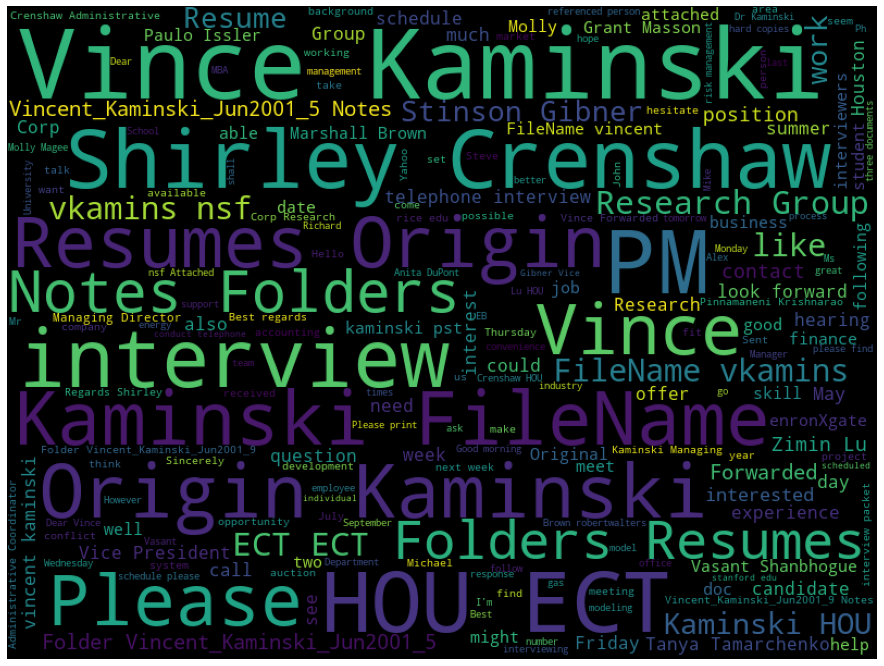

In [18]:
## Calling the function to check how it works

WC('resumes')

In [28]:
df = df.drop(columns = ['Stress_level'])

In [29]:
df.head()

,email-body,From,employee,Date,Subject,X-Folder,To,X-cc,X-Origin,year,...,trust,surprise,positive,negative,sadness,disgust,joy,topemotion,time_hour,Work
0,Here is our forecast,phillip.allen@enron.com,allen-p,2001-05-14 23:39:00+00:00,NaN,'sent mail,tim.belden@enron.com,NaN,Allen-P,2001,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,fear,23,Night
1,Traveling to have a business meeting takes the fun out of the trip. Especially if you have to ...,phillip.allen@enron.com,allen-p,2001-05-04 20:51:00+00:00,Re:,'sent mail,john.lavorato@enron.com,NaN,Allen-P,2001,...,0.106339,0.089980,0.114519,0.104294,0.100204,0.096115,0.100204,positive,20,Evening
2,test successful. way to go!!!,phillip.allen@enron.com,allen-p,2000-10-18 10:00:00+00:00,Re: test,'sent mail,leah.arsdall@enron.com,NaN,Allen-P,2000,...,0.111111,0.083333,0.111111,0.111111,0.111111,0.083333,0.111111,anticip,10,Work
3,"Randy, Can you send me a schedule of the salary and level of everyone in the scheduling group....",phillip.allen@enron.com,allen-p,2000-10-23 13:13:00+00:00,NaN,'sent mail,randall.gay@enron.com,NaN,Allen-P,2000,...,0.142857,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,trust,13,Work
4,Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,allen-p,2000-08-31 12:07:00+00:00,Re: Hello,'sent mail,greg.piper@enron.com,NaN,Allen-P,2000,...,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,fear,12,Work


In [20]:
data = df.groupby("year")["Stress_level"].value_counts(normalize  = True)

In [21]:
data

year  Stress_level
1999  Low             0.774051
      High            0.122765
      Medium          0.103184
2000  Low             0.776470
      High            0.133047
      Medium          0.090483
2001  Low             0.540557
      Medium          0.233727
      High            0.225716
2002  Low             0.426329
      Medium          0.305316
      High            0.268355
Name: Stress_level, dtype: float64

In [79]:
### making small datasets for selected  Folder basis to see emotion score for the employees for deployment purpose

HR = df.loc[df['X-Folder'] == 'hr']
KPMG = df.loc[df['X-Folder'] == 'kpmg']
Management = df.loc[df['X-Folder'] == 'management']
Resume = df.loc[df['X-Folder'] == 'resumes']
IT = df.loc[df['X-Folder'] == 'it']
Friends = df.loc[df['X-Folder'] == 'myfriends']
Personal = df.loc[df['X-Folder'] == 'personalfolder']
Interviews = df.loc[df['X-Folder'] == 'interviews']
Federal = df.loc[df['X-Folder'] == 'federal legislation']
Personal2 = df.loc[df['X-Folder'] == 'personal']


    

In [57]:
Personal2 = df.loc[df['X-Folder'] == 'personal']
Personal2.to_csv('prsnl.csv', index = False)


In [86]:
Managment

,email-body,From,employee,Date,Subject,X-Folder,To,X-cc,X-Origin,year,...,trust,surprise,positive,negative,sadness,disgust,joy,topemotion,time_hour,Work
131782,"Vince, I am planning to make my resignation from Enron so that June 5th would be my last day a...",stinson.gibner@enron.com,kaminski-v,2001-05-22 15:36:11+00:00,Resignation effective June 5,management,j.kaminski@enron.com,NaN,KAMINSKI-V,2001,...,0.105670,0.095361,0.103093,0.103093,0.097938,0.097938,0.095361,trust,15,Work
131783,X-Folder: \vkamins\c:\mangmt\group\Management X-Origin: KAMINSKI-V X-FileName: vincent kaminski ...,iris.mack@enron.com,kaminski-v,2001-04-30 21:35:00+00:00,RE: FW: FW: visit to Enron by Professor Nalin Kulatilaka of Boston\n University,management,nalink@bu.edu,"Martin Lin <Martin Lin/Contractor/Enron Communications@Enron Communications>, Vince J Kaminski <...",KAMINSKI-V,2001,...,0.104478,0.095522,0.110448,0.104478,0.101493,0.083582,0.095522,positive,21,Evening
131784,X-bcc: X-Folder: \Vincent_Kaminski_Jun2001_5\Notes Folders\C:\Mangmt\Group\Management X-Origin: ...,shirley.crenshaw@enron.com,kaminski-v,2001-03-19 07:52:00+00:00,Sokolov EIS Expenses,management,kevin.jolly@enron.com,"Vince J Kaminski, Vasant Shanbhogue, Anita DuPont",Kaminski-V,2001,...,0.117949,0.082051,0.107692,0.112821,0.097436,0.087179,0.100000,trust,7,Night
131785,"bob.lee@enron.com, gwyn.koepke@enron.com, hector.campos@enron.com, shirley.crenshaw@enron.com, y...",anita.dupont@enron.com,kaminski-v,2001-03-16 10:15:00+00:00,"Trash Bash Event on Saturday, March 31st",management,"vince.kaminski@enron.com, stinson.gibner@enron.com, \n\tpinnamaneni.krishnarao@enron.com, vasant...",NaN,Kaminski-V,2001,...,0.116525,0.099576,0.110169,0.099576,0.099576,0.084746,0.103814,trust,10,Work
131786,"shirley.crenshaw@enron.com, youyi.feng@enron.com, praveen.mellacheruvu@enron.com, stephen.bennet...",kevin.kindall@enron.com,kaminski-v,2001-03-15 08:31:00+00:00,Departure,management,"vince.kaminski@enron.com, stinson.gibner@enron.com, \n\tpinnamaneni.krishnarao@enron.com, vasant...","Glenn Darrah, James L Bouillion, Iris Mack, Li Sun, Kristin Gandy, Mark V Walker, Mark Ruane, Ru...",Kaminski-V,2001,...,0.107955,0.096591,0.119318,0.102273,0.096591,0.088068,0.096591,positive,8,Night
131787,"X-Origin: KAMINSKI-V X-FileName: vincent kaminski 1-30-02.pst Margaret, Thanks for reminding m...",sevil.yaman@enron.com,kaminski-v,2001-04-26 23:15:00+00:00,Re: HIB Visa Application - Sevil Yaman,management,margaret.daffin@enron.com,Vince J Kaminski <Vince J Kaminski/HOU/ECT@ECT>,KAMINSKI-V,2001,...,0.107417,0.095908,0.116368,0.103581,0.097187,0.093350,0.093350,positive,23,Night
131788,X-Origin: Kaminski-V X-FileName: vkamins.nsf Norma: you are correct in that Sevil and I have s...,margaret.daffin@enron.com,kaminski-v,2001-03-12 11:39:00+00:00,RE: green card,management,norma.villarreal@enron.com,"Sevil Yaman, Vince J Kaminski, Jane Allen",Kaminski-V,2001,...,0.113059,0.095530,0.119194,0.104294,0.092901,0.092901,0.097283,positive,11,Work
131789,"bob.lee@enron.com, gwyn.koepke@enron.com, hector.campos@enron.com, shirley.crenshaw@enron.com, y...",vince.kaminski@enron.com,kaminski-v,2001-03-12 11:31:00+00:00,"Enron Earth Day ""Trash Bash""",management,"vince.kaminski@enron.com, stinson.gibner@enron.com, \n\tpinnamaneni.krishnarao@enron.com, vasant...",NaN,Kaminski-V,2001,...,0.110727,0.094579,0.114187,0.099193,0.095732,0.092272,0.102653,positive,11,Work
131790,"Vince, Thanks for initiating this information flow. I think the confusion is coming from the qu...",sevil.yaman@enron.com,kaminski-v,2001-03-09 10:45:00+00:00,RE: green card,management,vince.kaminski@enron.com,NaN,Kaminski-V,2001,...,0.111953,0.093434,0.119529,0.103535,0.095118,0.092593,0.097643,positive,10,Work
131791,"X-Origin: Kaminski-V X-FileName: vkamins.nsf Sevil, I believe you and Margret Daffin have spok...",norma.villarreal@enron.com,kaminski-v,2001-03-08 18:31:00+00:00,RE: green card,management,"sevil.yaman@enron.com, margaret.daffin@enron.com",

In [80]:
HR.to_csv('hr.csv', index=False)
KPMG.to_csv('kpmg.csv', index=False)
Management.to_csv('management.csv', index=False)
Resume.to_csv('resume.csv', index=False)
IT.to_csv('it.csv', index=False)
Friends.to_csv('friends.csv', index=False)
Personal.to_csv('personal.csv', index=False)
Interviews.to_csv('interview.csv', index=False)
Federal.to_csv('federal.csv', index = False)



In [33]:
HR.Work.value_counts(normalize=True)

Night      0.432432
Evening    0.389189
Work       0.178378
Name: Work, dtype: float64

In [81]:
## Selected folders for deployment purpose

Folder_selected = ['hr', 'kpmg', 'management', 'resume', 'it', 'friends', 'personalfolder', 'interview', 'federal', 'personal']

In [85]:
df_folder.loc[df_folder['X-Folder'] == 'management']

,email-body,From,employee,Date,Subject,X-Folder,To,X-cc,X-Origin,year,...,trust,surprise,positive,negative,sadness,disgust,joy,topemotion,time_hour,Work


In [87]:
### making one common dataset for all selected folders

df_folder = pd.concat(map(pd.read_csv, ['folder/hr.csv', 'folder/kpmg.csv','folder/it.csv', 'folder/resume.csv', 'folder/management.csv', 'folder/friends.csv', 'folder/personal.csv', 'folder/interview.csv', 'folder/federal.csv', 'folder/prsnl.csv']))

In [88]:
df_folder.shape

(2725, 25)

In [84]:
df_folder

,email-body,From,employee,Date,Subject,X-Folder,To,X-cc,X-Origin,year,...,trust,surprise,positive,negative,sadness,disgust,joy,topemotion,time_hour,Work
0,"mary.solmonson@enron.com, martha.stevens@enron.com, robert.superty@enron.com, edward.terry@enron...",hector.mcloughlin@enron.com,beck-s,2001-04-04 01:52:00+00:00,Action Request,hr,"sally.beck@enron.com, thresa.allen@enron.com, bryce.baxter@enron.com, \n\tlinda.bryan@enron.com,...","Sunjay Arya <Sunjay Arya/ENRON@enronXgate>, John Blaylock <John Blaylock/ENRON@enronXgate>, Fran...",BECK-S,2001,...,0.113872,0.086957,0.118012,0.113872,0.095238,0.095238,0.086957,positive,1,Night
1,"Content-Transfer-Encoding: 7bit Bcc: exec.jones@enron.com, tim.o'rourke@enron.com, mary.joyce@en...",david.oxley@enron.com,kean-s,2001-12-05 17:20:42+00:00,New HR Contacts - post headcount reduction,hr,"kenneth.lay@enron.com, greg.whalley@enron.com, jim.fallon@enron.com, \n\tjohn.lavorato@enron.com...","Jones, Robert W.- HR Exec </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Rjones2>, O'rourke, Tim </O=ENRON/OU=...",Harris-S,2001,...,0.108642,0.083951,0.111111,0.113580,0.098765,0.093827,0.091358,negative,17,Work
2,"X-bcc: X-Folder: \Steven_Kean_Jan2002\Kean, Steven J.\HR X-Origin: Harris-S X-FileName: sharris1...",sheila.walton@enron.com,kean-s,2001-12-14 00:43:21+00:00,New HR Rep,hr,"j..kean@enron.com, elizabeth.linnell@enron.com, bill.donovan@enron.com, \n\tjohn.brindle@enron.c...","McVicker, Maureen </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Mmcvick>, De Jesus, Frank </O=ENRON/OU=NA/CN=...",Harris-S,2001,...,0.122302,0.093525,0.107914,0.100719,0.100719,0.093525,0.093525,trust,0,Night
3,"billy.lemmons@enron.com, norman.levine@enron.com, drew.lynch@enron.com, cindy.olson@enron.com, t...",norman.levine@enron.com,kean-s,2001-09-26 20:50:04+00:00,"Enron HR Newsletter - September 26, 2001",hr,"felecia.acevedo@enron.com, marla.barnard@enron.com, cynthia.barrow@enron.com, \n\tmelissa.becker...",NaN,Kean-S,2001,...,0.103774,0.066038,0.113208,0.122642,0.084906,0.132075,0.075472,disgust,20,Evening
4,Content-Transfer-Encoding: quoted-printable Bcc: steven.kean@enron.com X-From: Kathy McMahon X-T...,kathy.mcmahon@enron.com,kean-s,2001-04-09 14:31:00+00:00,PLEASE READ - HR Commercialization,hr,"marla.barnard@enron.com, cynthia.barrow@enron.com, suzanne.brown@enron.com, \n\ttimothy.callahan...",Steven J Kean,KEAN-S,2001,...,0.113636,0.086364,0.119697,0.106061,0.095455,0.089394,0.101515,positive,14,Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,Hey check these out dude. The Smashing Pumkins song is Drown and I can't find it on any other c...,crystal.hyde@enron.com,williams-w3,2001-04-17 00:21:00+00:00,Singles Debate,personal,bill.iii@enron.com,NaN,WILLIAMS-W3,2001,...,0.116667,0.083333,0.116667,0.100000,0.100000,0.100000,0.100000,trust,0,Night
1307,Hey let's go get coffee again that was really fun. I'm so much more awake now. When will you be...,crystal.hyde@enron.com,williams-w3,2001-04-05 03:25:00+00:00,yummy frappachino,personal,bill.iii@enron.com,NaN,WILLIAMS-W3,2001,...,0.106742,0.084270,0.117978,0.106742,0.095506,0.101124,0.106742,positive,3,Night
1308,You are cracking me up. Basically you are the only thing keeping me awake today..,crystal.hyde@enron.com,williams-w3,2001-04-05 02:44:00+00:00,Re: No Java?,personal,bill.iii@enron.com,NaN,WILLIAMS-W3,2001,...,0.142857,0.071429,0.178571,0.142857,0.107143,0.107143,0.071429,positive,2,Night
1309,So what's the situation? You swamped? Under pressure? Did some shit hit the fan or what? It mig...,crystal.hyde@enron.com,williams-w3,2001-04-05 02:42:00+00:00,Re: No Java?,personal,bill.iii@enron.com,NaN,WILLIAMS-W3,2001,...,0.091549,0.091549,0.098592,0.105634,0.105634,0.098592,0.091549,fear,2,Night


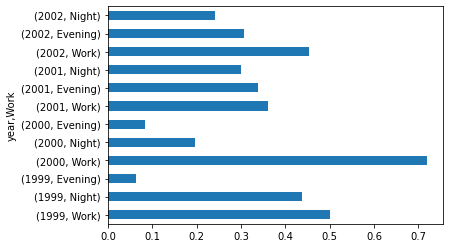

In [110]:
##  Ploting stress level over the years ---- (plotly)

df_folder.groupby("year")["Work"].value_counts(normalize = True).plot.barh()

In [90]:
## making csv for subset of folder file for deployment

df_folder.to_csv('df_folder.csv', index = False)

In [75]:
## making  wordcloud universal function only for selected folders 

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
import wordcloud


def WC_Folder(Folder, stpwords = None):
    
    data = df_folder.loc[df_folder['X-Folder'] == Folder]
     
    
    stop_words = stopwords.words('english')
    
    list_stpwords = ['enron', 'com', 're', 'RECIPIENTS', 'CN', 'ENRON', 'OU', 'NA', 'Thank', 'mail', 'know', 'get', 'Thanks', 'one', 'let', 'cc', 'bc', 'subject', 'http', 'www', 'hotmail', 'email', 'would', 'back', 'time', 'bcc','new', 'aol', 'Com', 'Original Message','message']
    
    if stpwords is True:
        
         list_stpwords.append(stpwords) 
        
        
    stop_words.extend(list_stpwords)

    subjects = ' '.join(data['email-body'])

    fig, ax = plt.subplots(figsize=(16, 12))

    wc = wordcloud.WordCloud(width=800, 
                             height=600, 
                             max_words=200,
                             stopwords=stop_words).generate(subjects)
    ax.imshow(wc)
    ax.axis("off")
    
    plot = ax.imshow(wc)
    
    return plot

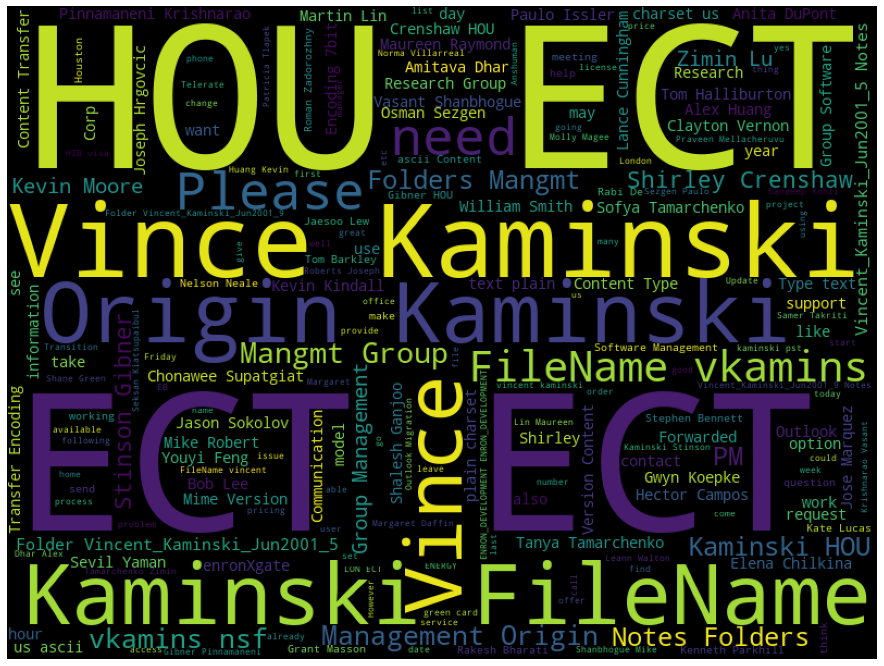

In [89]:
WC_Folder('management')

In [91]:
df_folder.head(2)

,email-body,From,employee,Date,Subject,X-Folder,To,X-cc,X-Origin,year,...,trust,surprise,positive,negative,sadness,disgust,joy,topemotion,time_hour,Work
0,"mary.solmonson@enron.com, martha.stevens@enron.com, robert.superty@enron.com, edward.terry@enron...",hector.mcloughlin@enron.com,beck-s,2001-04-04 01:52:00+00:00,Action Request,hr,"sally.beck@enron.com, thresa.allen@enron.com, bryce.baxter@enron.com, \n\tlinda.bryan@enron.com,...","Sunjay Arya <Sunjay Arya/ENRON@enronXgate>, John Blaylock <John Blaylock/ENRON@enronXgate>, Fran...",BECK-S,2001,...,0.113872,0.086957,0.118012,0.113872,0.095238,0.095238,0.086957,positive,1,Night
1,"Content-Transfer-Encoding: 7bit Bcc: exec.jones@enron.com, tim.o'rourke@enron.com, mary.joyce@en...",david.oxley@enron.com,kean-s,2001-12-05 17:20:42+00:00,New HR Contacts - post headcount reduction,hr,"kenneth.lay@enron.com, greg.whalley@enron.com, jim.fallon@enron.com, \n\tjohn.lavorato@enron.com...","Jones, Robert W.- HR Exec </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Rjones2>, O'rourke, Tim </O=ENRON/OU=...",Harris-S,2001,...,0.108642,0.083951,0.111111,0.113580,0.098765,0.093827,0.091358,negative,17,Work


In [102]:
import plotly.express as px
import plotly.graph_objects as go

In [108]:
fig = go.Figure(go.Scattergl(IT, x = 'time_hour', y = 'topemotion', title='Emotion hourly based work '))



ValueError: The first argument to the plotly.graph_objs.Scattergl 
constructor must be a dict or 
an instance of :class:`plotly.graph_objs.Scattergl`

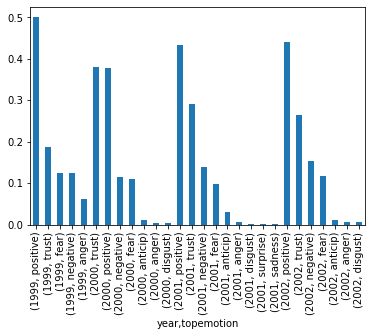

In [114]:
df_folder.groupby("year")["topemotion"].value_counts(normalize = True).plot.bar()

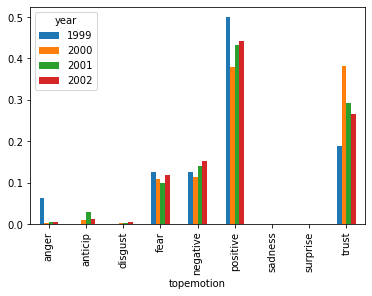

In [117]:
df_folder.groupby('year').topemotion.value_counts(normalize= True).unstack(0).plot.bar()

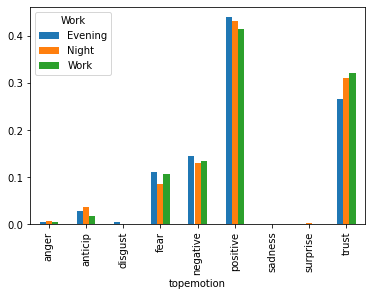

In [124]:
df_folder.groupby('Work').topemotion.value_counts(normalize = True).unstack(0).plot.bar()

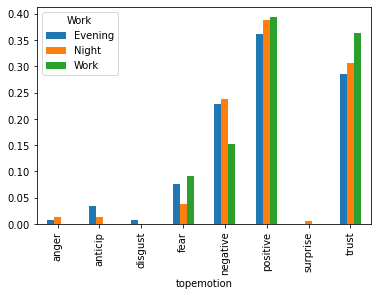

In [125]:
HR.groupby('Work').topemotion.value_counts(normalize = True).unstack(0).plot.bar()

In [ ]:
def plot(Folder):
    
    data = df_folder.loc[df_folder['X-Folder'] == Folder]
    
    data.groupby('year').topemotion.value_counts(normalize = True).unstack(0).plot.bar()
    
    data.groupby('year').time_hour.value_counts(normalize = True).unstack(0).plot.bar()
    
    data.groupby('year').Work.value_counts(normalize = True).unstack(0).plot.bar()
    

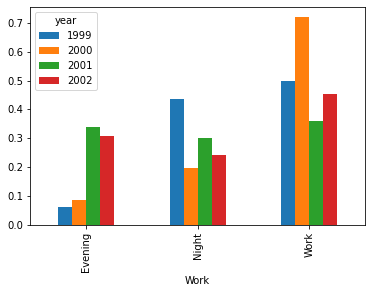

In [126]:
df_folder.groupby('year').Work.value_counts(normalize = True).unstack(0).plot.bar()